In [1]:
import os
from scipy.io import loadmat
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
path = 'datasets/dataset1_reaching-task'
fname = os.path.join(path, 'Dataset1.mat')

data = loadmat(fname)
y = data['direction']
x = data['R']
x = np.concatenate((x[:23, :], x[24:, :]))

# reformat y
y_ref = np.zeros(len(y))
for (i, val) in enumerate(y):
    y_ref[i]= val
    
y = y_ref # overwriting

Text(0.5, 0, 'trials')

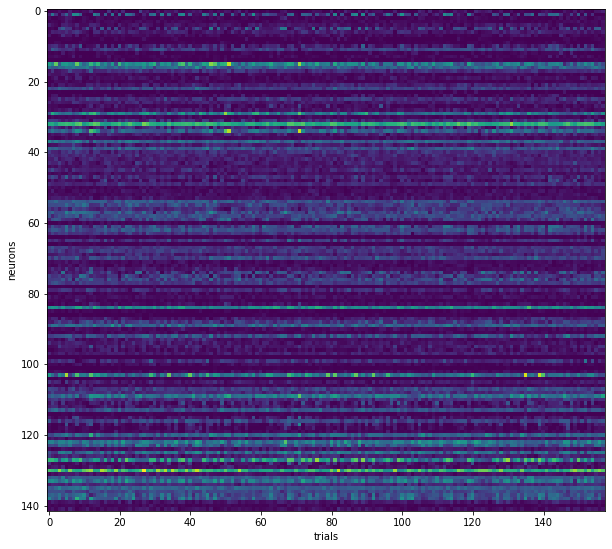

In [3]:
plt.figure(figsize=(10,10))
plt.imshow(x)
plt.ylabel('neurons')
plt.xlabel('trials')

Text(0.5, 0, 'trials')

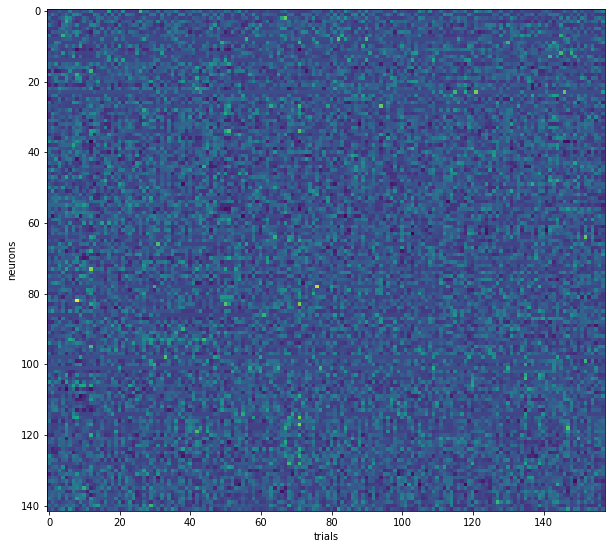

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(zscore(x,1))
plt.ylabel('neurons')
plt.xlabel('trials')

In [5]:
inds_sort = np.argsort(y)
ch_trials = np.where(np.diff(y[inds_sort]) == 1)
x_sorted = x[:,inds_sort]

Text(0.5, 0, 'trials')

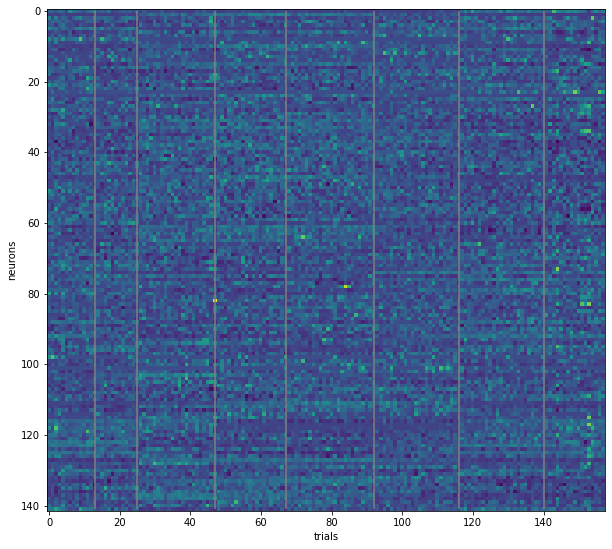

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(zscore(x_sorted,axis=1))
plt.vlines(ch_trials, 0, 141, color='grey')
plt.ylabel('neurons')
plt.xlabel('trials')

In [7]:
#getting condition-averaged population vector

avgs = []
stds = []

for i in range(1, int(max(y))+1):
    dir_avg = np.mean(x[:,y==i], axis=1)
    dir_std = np.std(x[:,y==i], axis=0)
    avgs.append(dir_avg)
    stds.append(dir_std)
    
avgs_array = np.asarray(avgs)
stds_array = np.asarray(avgs)

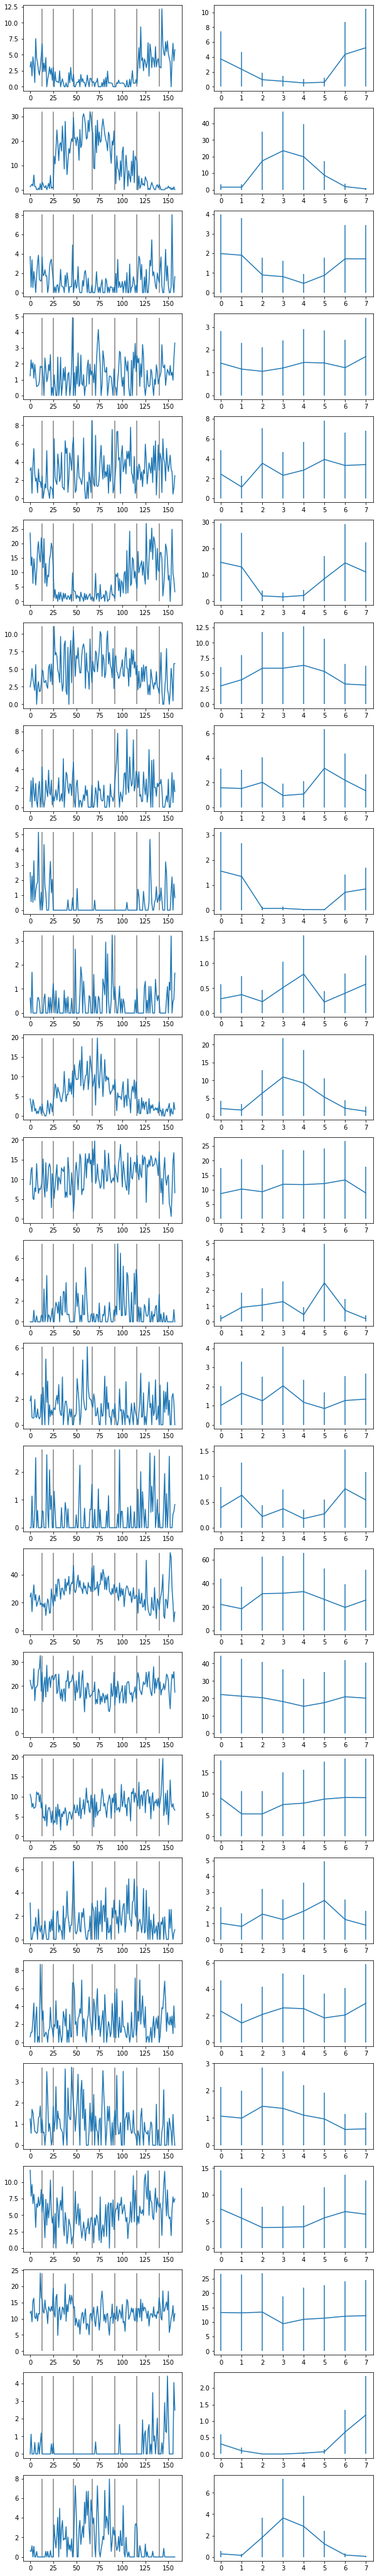

In [8]:
n_plots = 25

_, axs = plt.subplots(n_plots, 2, figsize=(10,n_plots*3))

for i in range(n_plots):
    axs[i,0].vlines(ch_trials, 0, max(x_sorted[i,:]), color='grey')
    axs[i,0].plot(x_sorted[i,:])
    axs[i,1].errorbar(np.arange(0,8), avgs_array.T[i,:], yerr = stds_array[:,i])

In [9]:
# TODO: fit tuning function and then plot distribution of maxima
# TODO: polar plots https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html

In [10]:
pca = PCA(n_components=10)
pca.fit(x)

PCA(n_components=10)

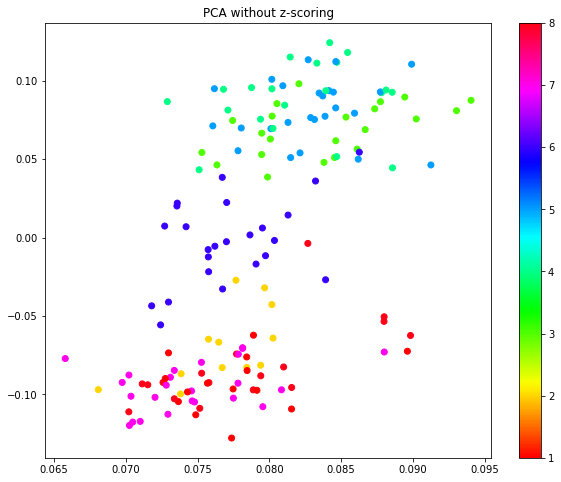

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(pca.components_[0,:], pca.components_[1,:], c=y, cmap='hsv')
plt.title('PCA without z-scoring')
plt.colorbar()

In [12]:
pca = PCA(n_components=10)
pca.fit(zscore(x,1))

PCA(n_components=10)

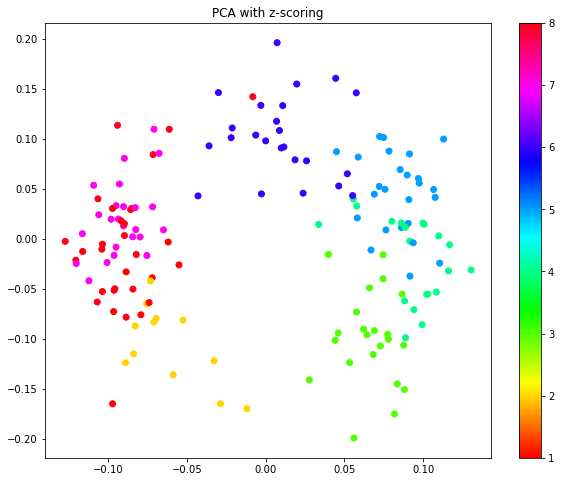

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(pca.components_[0,:], pca.components_[1,:], c=y, cmap='hsv')
plt.title('PCA with z-scoring')
plt.colorbar()

Text(0.5, 1.0, 'Scree plot')

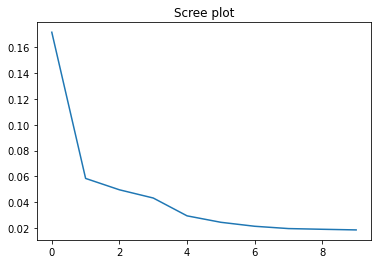

In [14]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree plot')
# think of surrogate distribution for decreasing of the slope of scree plot
# maybe just take one trial type, do PCA and get an estimate for a 'noise distribution'